In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('../input/titanic/train_and_test2.csv')
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [3]:
df.shape

(1309, 28)

In [4]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
scaler = MinMaxScaler()
scaler.fit_transform(df)

array([[0.00000000e+00, 2.73456094e-01, 1.41510576e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.64525994e-04, 4.73881999e-01, 1.39135735e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.52905199e-03, 3.23562570e-01, 1.54685698e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [9.98470948e-01, 4.80145309e-01, 1.41510576e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99235474e-01, 3.48615809e-01, 1.57125536e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.48615809e-01, 4.36404952e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [7]:
df.rename(columns={'2urvived':'Survived'},inplace=True)

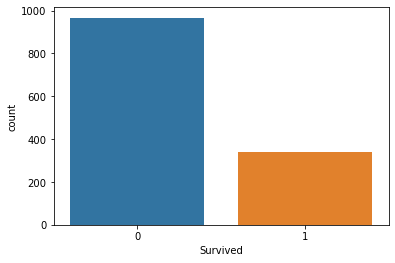

In [8]:
sb.countplot('Survived',data=df)

In [9]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex  Survived
0    0           734
     1           109
1    0           233
     1           231
Name: Survived, dtype: int64

In [10]:
Y = df['Survived'].to_numpy()
df = df.drop(columns=['Survived'])
X = df.to_numpy()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33, random_state=42)
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train,y_train)
predict = clf.predict(X_test)
print('Accuracy score:',accuracy_score(predict,y_test))

Accuracy score: 0.8310185185185185


In [12]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       308
           1       0.79      0.56      0.66       124

    accuracy                           0.83       432
   macro avg       0.81      0.75      0.77       432
weighted avg       0.83      0.83      0.82       432

